In [8]:
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import json

In [6]:
training_plots_dir = '/home/prash/results/madrid/v20210729/HUF/split-by=patient_id/collapsed_features_dynamic_input_output/skorch_logistic_regression/'
training_files = glob.glob(os.path.join(training_plots_dir, '*history.json'))

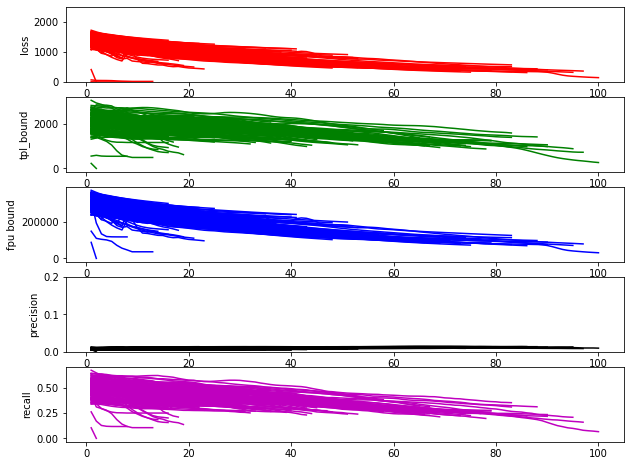

In [25]:
f, axs = plt.subplots(5, 1, figsize=(10, 8))
for training_file in training_files:
    try:
        train_df = pd.DataFrame(json.load(open(training_file)))
        epochs = train_df['epoch'].values

        # get losses
        surr_loss_train = train_df['surr_loss_train'].values
        surr_loss_valid = train_df['surr_loss_valid'].values

        # get bounds
        tpl_bound_train = train_df['tpl_bound_train'].values
        tpl_bound_valid = train_df['tpl_bound_valid'].values

        fpu_bound_train = train_df['fpu_bound_train'].values
        fpu_bound_valid = train_df['fpu_bound_valid'].values

        # get precision recall
        precision_train = train_df['precision_train'].values
        precision_valid = train_df['precision_valid'].values

        recall_train = train_df['recall_train'].values
        recall_valid = train_df['recall_valid'].values

        axs[0].plot(epochs, surr_loss_train, 'r')
        axs[1].plot(epochs, tpl_bound_train, 'g')
        axs[2].plot(epochs, fpu_bound_train, 'b')
        axs[3].plot(epochs, precision_train, 'k')
        axs[4].plot(epochs, recall_train, 'm')
    except:
        continue

axs[0].set_ylabel('loss')
axs[0].set_ylim([0, 2500.])

axs[1].set_ylabel('tpl_bound')
axs[2].set_ylabel('fpu bound')
axs[3].set_ylabel('precision')
axs[3].set_ylim([0, 0.2])

axs[4].set_ylabel('recall')
plt.show()

In [17]:




train_df

,batches,epoch,train_batch_count,valid_batch_count,dur,train_loss,train_loss_best,valid_loss,valid_loss_best,precision_train,...,auprc_valid_best,tp_train,tp_train_best,tp_valid,tp_valid_best,fp_train,fp_train_best,fp_valid,fp_valid_best,event_cp
0,"[{'train_loss': 1.0510709325207586, 'train_bat...",1,103,37,16.397836,1.141306,True,1.057218,True,0.005398,...,True,19943.900391,True,7166.147461,True,258700.0,True,95793.0,True,True
1,"[{'train_loss': 0.8520675778131976, 'train_bat...",2,103,37,15.999291,1.010419,True,0.957973,True,0.005277,...,True,19746.031250,False,7065.143555,False,227320.0,False,82899.0,False,True
2,"[{'train_loss': 0.8166252019039597, 'train_bat...",3,103,37,16.050049,0.929939,True,0.882612,True,0.006504,...,True,19404.259766,False,6925.137695,False,131979.0,False,46423.0,False,True
3,"[{'train_loss': 0.7668075736982427, 'train_bat...",4,103,37,15.931239,0.859375,True,0.816017,True,0.007127,...,True,19179.404297,False,6863.135254,False,89016.0,False,30622.0,False,True
4,"[{'train_loss': 0.7128359369379391, 'train_bat...",5,103,37,15.976481,0.794262,True,0.754982,True,0.011110,...,True,18854.636719,False,6746.130859,False,27948.0,False,10160.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"[{'train_loss': 0.0680395207872056, 'train_bat...",96,103,37,15.972201,0.049034,True,0.047082,True,0.490385,...,False,18591.847656,False,6650.127930,False,53.0,False,44.0,False,True
96,"[{'train_loss': 0.06806219051626963, 'train_ba...",97,103,37,15.861422,0.049005,True,0.047074,True,0.494949,...,False,18589.849609,False,6650.127930,False,50.0,False,46.0,False,True
97,"[{'train_loss': 0.06808286801092997, 'train_ba...",98,103,37,16.047824,0.048948,True,0.047048,True,0.490566,...,False,18592.847656,False,6650.127930,False,54.0,False,46.0,False,True
98,"[{'train_loss': 0.06812438510009892, 'train_ba...",99,103,37,15.850811,0.048946,True,0.047046,True,0.490385,...,False,18591.847656,False,6651.127930,False,53.0,False,51.0,False,True
